In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
import pickle
import joblib
from joblib import dump

In [20]:
#Loading data into dataframe
data = pd.read_csv("phishing_dataset_features.csv")
data.head()

,url,label,url_len,num_dots,has_ip,has_at,uses_https,domain,num_hyphens,num_subdomains,...,path_length,query_length,num_special_chars,has_http_token,has_port,domain_len,suspicious_tld,https_in_domain,hostname_len,digit_count
0,http://117.209.88.26:49789/i\r,1.0,29,3,1,0,0,117.209.88.26,0,2,...,2,0,0,0,1,13,0,0,13,15
1,https://thechinaguide.com,0.0,25,1,0,0,1,thechinaguide,0,0,...,0,0,0,0,0,13,0,0,17,0
2,http://176.65.137.221/bins/nemil.x86_64\r,1.0,40,4,1,0,0,176.65.137.221,0,2,...,18,0,1,0,0,14,0,0,14,15
3,https://vets.ne.jp,0.0,18,2,0,0,1,vets,0,1,...,0,0,0,0,0,4,0,0,10,0
4,https://leoslot25.xyz,0.0,21,1,0,0,1,leoslot25,0,0,...,0,0,0,0,0,9,0,0,13,2


In [3]:
#shape of dataframe
data.shape

(1110854, 23)

In [4]:
#listing features of the dataset
data.columns

Index(['url', 'label', 'url_len', 'num_dots', 'has_ip', 'has_at', 'uses_https',
       'domain', 'num_hyphens', 'num_subdomains', 'has_suspicious_words',
       'url_entropy', 'is_shortened', 'path_length', 'query_length',
       'num_special_chars', 'has_http_token', 'has_port', 'domain_len',
       'suspicious_tld', 'https_in_domain', 'hostname_len', 'digit_count'],
      dtype='object')

In [14]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110854 entries, 0 to 1110853
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   url                   1110854 non-null  object 
 1   label                 1110854 non-null  float64
 2   url_len               1110854 non-null  int64  
 3   num_dots              1110854 non-null  int64  
 4   has_ip                1110854 non-null  int64  
 5   has_at                1110854 non-null  int64  
 6   uses_https            1110854 non-null  int64  
 7   num_hyphens           1110854 non-null  int64  
 8   num_subdomains        1110854 non-null  int64  
 9   has_suspicious_words  1110854 non-null  int64  
 10  url_entropy           1110854 non-null  float64
 11  is_shortened          1110854 non-null  int64  
 12  path_length           1110854 non-null  int64  
 13  query_length          1110854 non-null  int64  
 14  num_special_chars     1110854 non-

In [7]:
# nunique value in columns
data.nunique()

url                     1110854
label                         2
url_len                     218
num_dots                     15
has_ip                        2
has_at                        2
uses_https                    2
domain                   909172
num_hyphens                  18
num_subdomains                6
has_suspicious_words          2
url_entropy               18612
is_shortened                  2
path_length                 174
query_length                 80
num_special_chars            35
has_http_token                2
has_port                      2
domain_len                   59
suspicious_tld                2
https_in_domain               2
hostname_len                 66
digit_count                  84
dtype: int64

In [8]:
#description of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1110854.0,0.099792,0.299722,0.000000,0.000000,0.000000,0.000000,1.000000
url_len,1110854.0,23.429796,8.716005,12.000000,19.000000,22.000000,26.000000,746.000000
num_dots,1110854.0,1.327615,0.779764,1.000000,1.000000,1.000000,1.000000,19.000000
has_ip,1110854.0,0.076699,0.266113,0.000000,0.000000,0.000000,0.000000,1.000000
has_at,1110854.0,0.000013,0.003550,0.000000,0.000000,0.000000,0.000000,1.000000
uses_https,1110854.0,0.912747,0.282205,0.000000,1.000000,1.000000,1.000000,1.000000
num_hyphens,1110854.0,0.132319,0.472836,0.000000,0.000000,0.000000,0.000000,23.000000
num_subdomains,1110854.0,0.260969,0.594379,0.000000,0.000000,0.000000,0.000000,6.000000
url_entropy,1110854.0,3.774800,0.244567,1.104269,3.616875,3.784184,3.921928,6.002367
path_length,1110854.0,1.135698,6.179969,0.000000,0.000000,0.000000,0.000000,380.000000


['url', 'label', 'url_len', 'num_dots', 'has_ip', 'has_at', 'uses_https', 'num_hyphens', 'num_subdomains', 'has_suspicious_words', 'url_entropy', 'is_shortened', 'path_length', 'query_length', 'num_special_chars', 'has_http_token', 'has_port', 'domain_len', 'suspicious_tld', 'https_in_domain', 'hostname_len', 'digit_count']


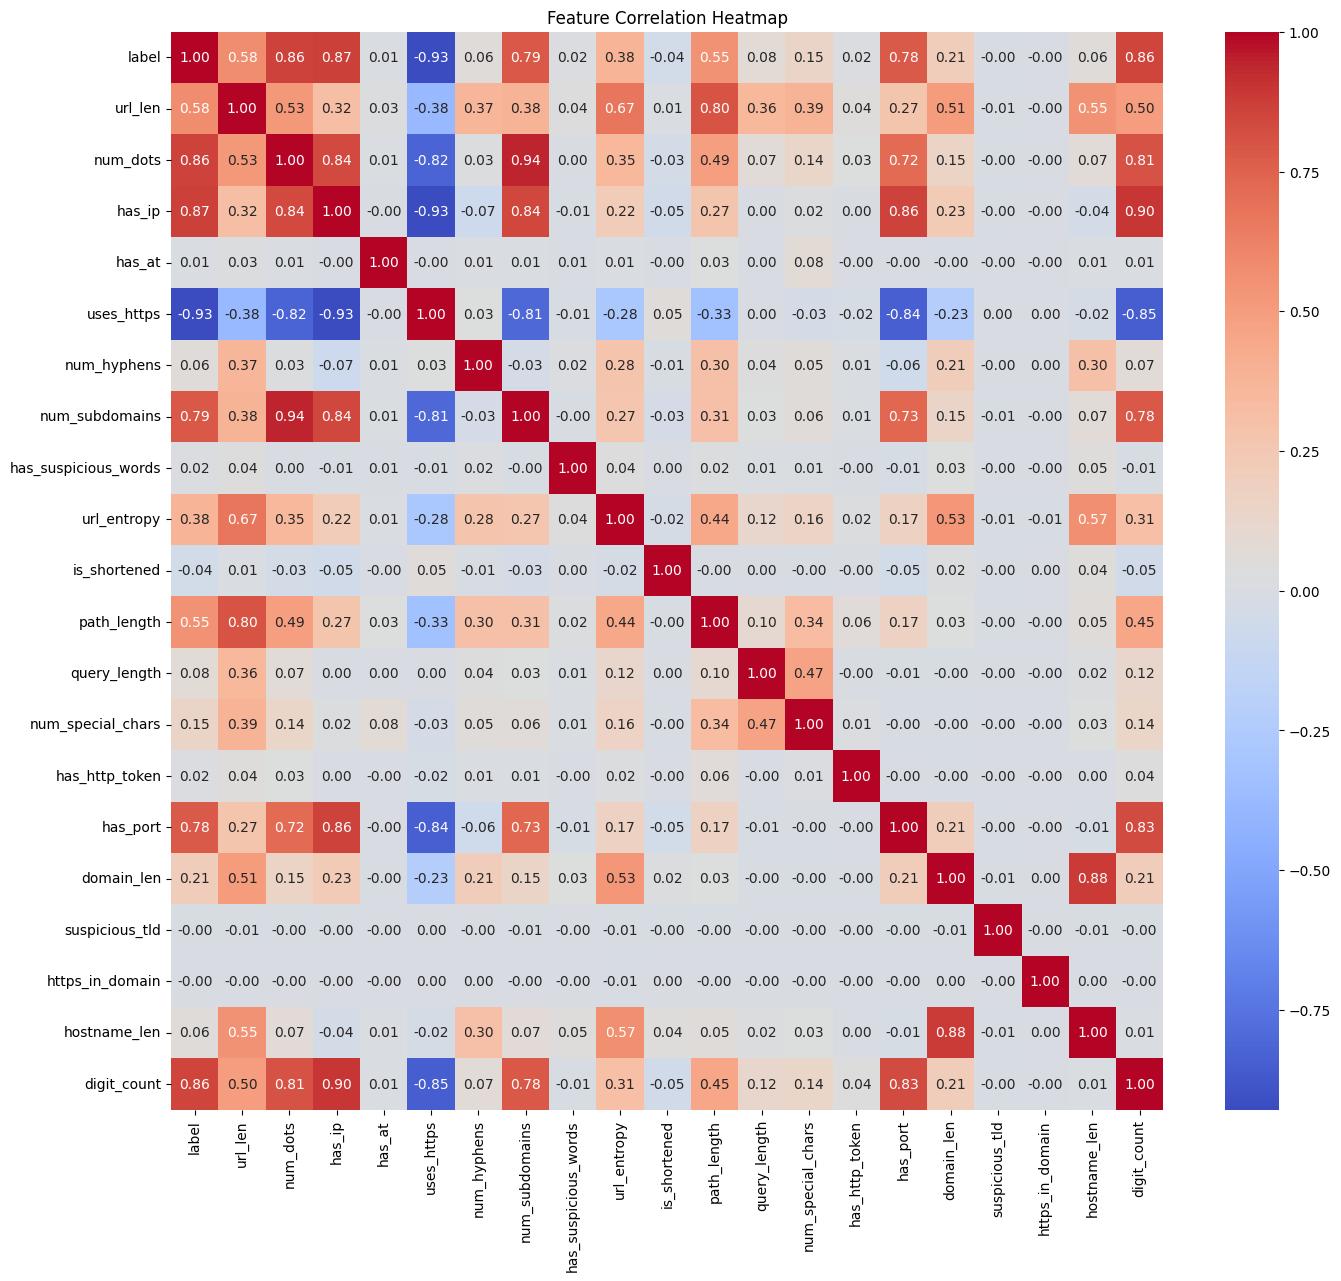

In [15]:
data.columns = data.columns.str.strip()
print(data.columns.tolist())
#Drop 'domain' column for correlation
data = data.drop(columns=['domain'],errors='ignore')

# Convert boolean columns to int
data['has_suspicious_words'] = data['has_suspicious_words'].astype(int)
data['is_shortened'] = data['is_shortened'].astype(int)

# Drop non-numeric columns before calculating correlation
data_numeric = data.select_dtypes(include=['int64', 'float64'])

# Now everything is numeric; ready for correlation
corr_matrix = data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [3]:
data = pd.read_csv("phishing_dataset_enriched.csv")
data.head()

,url,label,url_len,num_dots,has_ip,has_at,uses_https,domain,num_hyphens,num_subdomains,...,hostname_len,digit_count,domain_age_days,header_status_code,header_server,header_powered_by,header_has_csp,geo_country,geo_org,geo_asn
0,https://jerseyairport.com,0.0,25,1,0,0,1,jerseyairport,0,0,...,17,0,-1,-1.0,NaN,NaN,False,JE,AS8680 Sure (Guernsey) Limited,NaN
1,https://github.com/McFlury62/ZIPsnipp/releases...,1.0,73,3,0,0,1,github,0,0,...,10,4,-1,404.0,github.com,NaN,True,IN,AS8075 Microsoft Corporation,NaN
2,http://222.137.85.83:38125/i\r,1.0,29,3,1,0,0,222.137.85.83,0,2,...,13,15,-1,-1.0,NaN,NaN,False,NaN,NaN,NaN
3,http://deutsclhllandtlclket-de.spongebobcoinso...,1.0,65,3,0,0,0,spongebobcoinsol,1,1,...,44,4,-1,-1.0,NaN,NaN,False,NaN,NaN,NaN
4,http://117.204.231.76:55465/bin.sh\r,1.0,35,4,1,0,0,117.204.231.76,0,2,...,14,16,-1,-1.0,NaN,NaN,False,NaN,NaN,NaN


In [4]:
data.shape#the enriched_dataset now conatins 31 features

(10000, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   10000 non-null  object 
 1   label                 10000 non-null  float64
 2   url_len               10000 non-null  int64  
 3   num_dots              10000 non-null  int64  
 4   has_ip                10000 non-null  int64  
 5   has_at                10000 non-null  int64  
 6   uses_https            10000 non-null  int64  
 7   domain                10000 non-null  object 
 8   num_hyphens           10000 non-null  int64  
 9   num_subdomains        10000 non-null  int64  
 10  has_suspicious_words  10000 non-null  bool   
 11  url_entropy           10000 non-null  float64
 12  is_shortened          10000 non-null  bool   
 13  path_length           10000 non-null  int64  
 14  query_length          10000 non-null  int64  
 15  num_special_chars   

In [6]:
#Drop Columns That Are Useless or Have Too Many Nulls
data.drop(columns=[
    "geo_asn",           # completely empty
    "header_powered_by", # <1% non-null
    "header_server",     # low coverage
    "url", "domain"      # raw strings not needed
], inplace=True)

#Impute Missing Values in Useful Columns
header_status_code → fill with -1 or median
header_has_csp → fill with False
geo_country/org → fill with "NA"

In [7]:
data.fillna({
    "header_status_code": -1,
    "header_has_csp": False,
    "geo_country": "NA",
    "geo_org": "NA"
}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12692\4074149046.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna({


In [8]:
categorical_columns = ["header_has_csp", "geo_country", "geo_org"]
for col in categorical_columns:
    data[col] = data[col].astype("category")


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   label                 10000 non-null  float64 
 1   url_len               10000 non-null  int64   
 2   num_dots              10000 non-null  int64   
 3   has_ip                10000 non-null  int64   
 4   has_at                10000 non-null  int64   
 5   uses_https            10000 non-null  int64   
 6   num_hyphens           10000 non-null  int64   
 7   num_subdomains        10000 non-null  int64   
 8   has_suspicious_words  10000 non-null  bool    
 9   url_entropy           10000 non-null  float64 
 10  is_shortened          10000 non-null  bool    
 11  path_length           10000 non-null  int64   
 12  query_length          10000 non-null  int64   
 13  num_special_chars     10000 non-null  int64   
 14  has_http_token        10000 non-null  int64   
 15  has

In [10]:
#drop_first=True helps prevent multicollinearity.
data = pd.get_dummies(data, columns=["header_has_csp", "geo_country", "geo_org"], drop_first=True)

In [11]:
data.shape

(10000, 256)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 256 entries, label to geo_org_NA
dtypes: bool(235), float64(3), int64(18)
memory usage: 3.8 MB


['label', 'url_len', 'num_dots', 'has_ip', 'has_at', 'uses_https', 'num_hyphens', 'num_subdomains', 'has_suspicious_words', 'url_entropy', 'is_shortened', 'path_length', 'query_length', 'num_special_chars', 'has_http_token', 'has_port', 'domain_len', 'suspicious_tld', 'https_in_domain', 'hostname_len', 'digit_count', 'domain_age_days', 'header_status_code', 'header_has_csp_True', 'geo_country_AR', 'geo_country_AU', 'geo_country_BE', 'geo_country_BG', 'geo_country_BR', 'geo_country_CA', 'geo_country_CH', 'geo_country_CN', 'geo_country_CY', 'geo_country_CZ', 'geo_country_DE', 'geo_country_DK', 'geo_country_EE', 'geo_country_ES', 'geo_country_FI', 'geo_country_FR', 'geo_country_GB', 'geo_country_GR', 'geo_country_HK', 'geo_country_HU', 'geo_country_ID', 'geo_country_IE', 'geo_country_IM', 'geo_country_IN', 'geo_country_IR', 'geo_country_IT', 'geo_country_JE', 'geo_country_JP', 'geo_country_KH', 'geo_country_KR', 'geo_country_LV', 'geo_country_NA', 'geo_country_NC', 'geo_country_NL', 'geo_

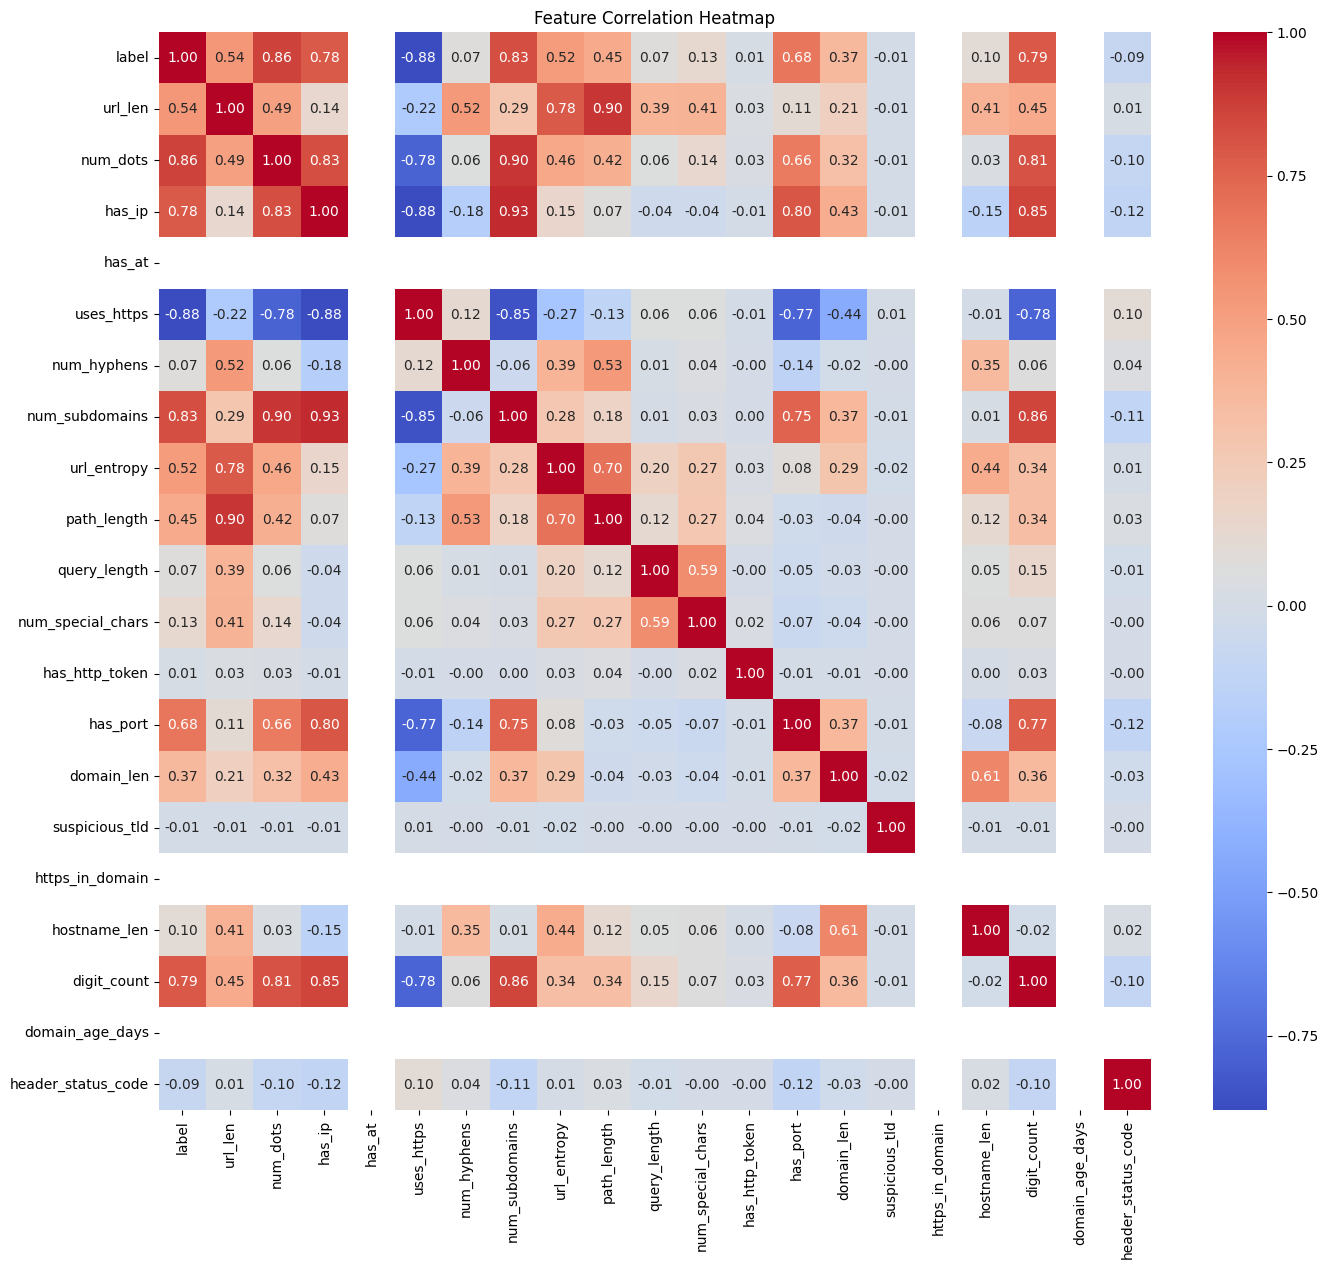

In [14]:
data.columns = data.columns.str.strip()
print(data.columns.tolist())
#Drop 'domain' column for correlation
data_numeric = data.drop(columns=['domain'],errors='ignore')

# Drop non-numeric columns before calculating correlation
data_numeric = data_numeric.select_dtypes(include=['int64', 'float64'])

# Now everything is numeric; ready for correlation
corr_matrix = data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
X = data.drop(columns=['label'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
# X is your final training input after preprocessing and encoding
joblib.dump(X.columns.tolist(), "training_columns.pkl")

['training_columns.pkl']

<Axes: >

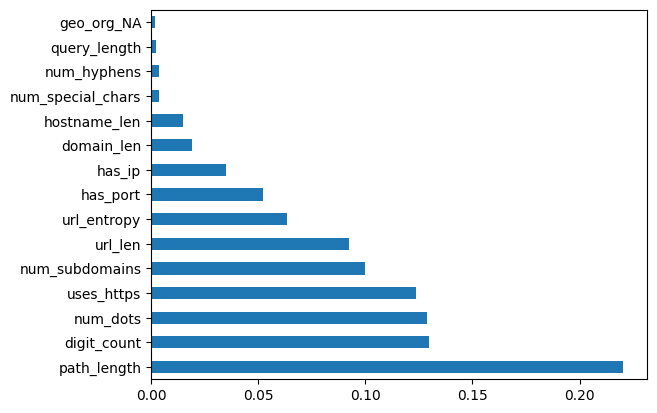

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Sort features by importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh')

In [16]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [17]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 99.90%


In [18]:
#cross-validation
# Step 1: Perform Cross-Validation (before training final model)
clf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Step 2: Split data and train final model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 3: Evaluate on test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Cross-validation scores: [0.999 0.999 1.    1.    1.   ]
Mean CV Accuracy: 99.96%
Test Accuracy: 99.90%


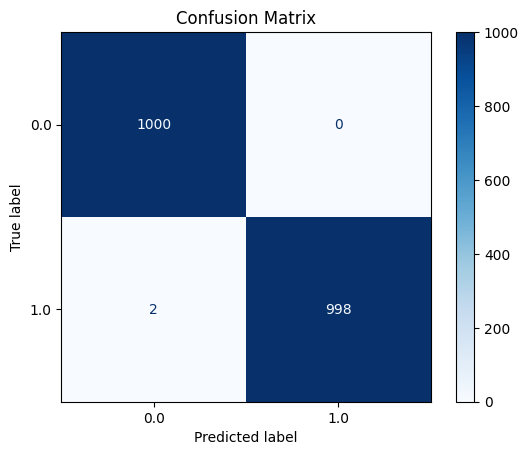

In [50]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [54]:
# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape after PCA:", X_pca.shape)


Original shape: (10000, 255)
Reduced shape after PCA: (10000, 191)


In [59]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
acc = accuracy_score(y_test, y_pred_lr)
print("Accuracy: {:.2f}%".format(acc * 100))

Logistic Regression Accuracy: 0.992
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1000
         1.0       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy: 99.20%


In [58]:
# SVM Model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy: {:.2f}%".format(acc * 100))

SVM Accuracy: 0.985
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1000
         1.0       0.99      0.97      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.98      0.98      2000

Accuracy: 98.50%


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:51:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



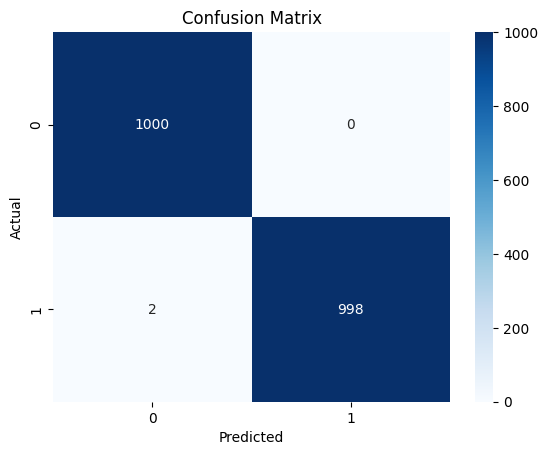

Accuracy: 99.90%


In [20]:

# Initialize XGBoost classifier
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: Feature Importance
xgb_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.show()
acc=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

The purpose of using GridSearchCV (or hyperparameter tuning) is to find the best combination of hyperparameters that make your model perform optimally on unseen data. 


In [18]:
#random forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit
grid_search.fit(X_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
dump(grid_search, "random_forest_model.joblib")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.99975
Test Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1000    0]
 [   2  998]]


NameError: name 'dump' is not defined

In [53]:
#LOGISTIC REGRESSION
param_grid = {
    'C': [0.1, 1.0, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
dump(grid, "logistic_regression_model.joblib")

Accuracy: 0.999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1000    0]
 [   2  998]]


['logistic_regression_model.joblib']

In [55]:
#SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
dump(grid, "svm_model.joblib")

Accuracy: 0.999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1000    0]
 [   2  998]]


['svm_model.joblib']

In [56]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
dump(grid, "xgboost_model.joblib")

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:42] WARNING: C:\actions-r

Accuracy: 0.999
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1000    0]
 [   2  998]]


['xgboost_model.joblib']

In [37]:
# Base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svm', SVC(probability=True)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Final estimator (meta-learner)
meta_model = LogisticRegression()

# Stacking ensemble
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Train
stacking.fit(X_train, y_train)

# Predict
y_pred = stacking.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:55:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:55:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:55:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:55:46] WARNING: C:\actions-r

Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1000    0]
 [   2  998]]


In [49]:
from joblib import dump
dump(stacking, "stacking_model.joblib")

['stacking_model.joblib']